# Exploratory analysis on Temperature data of Telangana state

In [1]:
import pandas as pd
import zipfile
import numpy as np
from matplotlib import pyplot as plt

**Temperature data 2013-2017**

In [2]:
zf=zipfile.ZipFile('telangana-temperature-data-from-2013-to-2017-All-2020-01-20_1228.zip')

In [3]:
df_max=pd.read_csv(zf.open('Monthly Maximum Temperature.csv'),header=0,usecols=list(range(58)))
df_min=pd.read_csv(zf.open('Monthly Minimum Temperature.csv'),header=0,usecols=list(range(58)))

In [4]:
df_merge=pd.merge(df_max,df_min,how='outer',right_on='Dmcode',left_on='Mandal',suffixes=('_max','_min'))

df_merge.drop(columns=['District_min','Mandal_min'],inplace=True)

df_merge.fillna(0,inplace=True)

df_13_17_final=pd.melt(df_merge,id_vars=['Mandal_max','District_max','Mandal.1'])

df_13_17_final.columns=['Mandal','District','Mandal.1','Date','Temp']

df1=df_13_17_final[df_13_17_final['Date'].str.contains('min')].sort_values('Mandal',ascending=True).reset_index()

df2=df_13_17_final[df_13_17_final['Date'].str.contains('max')].sort_values('Mandal',ascending=True)['Temp'].reset_index()

df_13_17=pd.concat([df1,df2],axis=1,ignore_index=True).drop(columns=[0,6])

df_13_17.columns=['Mandal','District','Mandal.1','Date','min_temp','max_temp']

df_13_17['Month']=df_13_17['Date'].str[:3]

df_13_17['Month']=pd.to_datetime(df_13_17['Month'],format='%b').dt.month

df_13_17['Year']=('20'+df_13_17['Date'].str[4:6]).astype(int)

**Temperature data 2019**

In [5]:
zf1=zipfile.ZipFile('2019-telangana-temperature-data-All-2020-01-20_1227.zip')

df_3=pd.read_csv(zf1.open('temperature_January_to_March_2019.csv'),header=0,parse_dates=['Date'],usecols=[1, 2, 3, 4, 5])
df_6=pd.read_csv(zf1.open('temperature_April_to_June_2019.csv'),header=0,parse_dates=['Date'],usecols=[1, 2, 3, 4, 5])
df_9=pd.read_csv(zf1.open('temperature_July_to_Sept_2019.csv'),header=0,parse_dates=['Date'],usecols=[1, 2, 3, 4, 5])
df_12=pd.read_csv(zf1.open('temperature_Oct_to_Dec_2019.csv'),header=0,parse_dates=['Date'],usecols=[1, 2, 3, 4, 5])

df_2019=pd.concat([df_3,df_6,df_9,df_12],axis=0)

df_2019.rename(columns={'temp_min (⁰C)':'min_temp','temp_max (⁰C)':'max_temp'},inplace=True)
df_2019.columns

Index(['District', 'Mandal', 'Date', 'min_temp', 'max_temp'], dtype='object')

In [6]:
df_2019['Year']=df_2019.Date.dt.year
df_2019['Month']=df_2019.Date.dt.month
df_2019['Mandal']=df_2019['Mandal'].str.strip()

In [7]:
grouped=df_2019.groupby(['Year','Month','District','Mandal']).agg({'min_temp':'mean','max_temp':'mean'}).reset_index()

df_13_17.drop(columns='Mandal',inplace=True)

df_13_17.rename(columns={'Mandal.1':'Mandal'},inplace=True)

df_13_17=df_13_17[['Year','Month','District','Mandal','min_temp','max_temp']]

**Temperature 2018 data**

In [8]:
df_2018=pd.read_csv("2018_daily_temperature_data.csv",header=0,usecols=[2,3,5,6,7],parse_dates=['Date'],names=['District','Mandal','Date','min_temp','max_temp'])

df_2018['Year']=df_2018.Date.dt.year
df_2018['Month']=df_2018.Date.dt.month

df_18=df_2018.groupby(['Year','Month','District','Mandal']).agg({'min_temp':'mean','max_temp':'mean'}).reset_index()

df_18[['min_temp','max_temp']]=df_18[['min_temp','max_temp']].apply(lambda x:np.round(x,1))

df_18=df_18[['Year','Month','District','Mandal','min_temp','max_temp']]

**Merging above dataframes**

In [9]:
df_13_20=pd.concat([df_13_17,df_18,grouped],axis=0,sort=False)

df_13_20=df_13_20.sort_values(['Mandal','Year','Month'],ascending=[True,True,True]).reset_index().drop(columns='index')

df_13_20.Mandal=df_13_20.Mandal.str.replace('_',' ')
df_13_20.Mandal=df_13_20.Mandal.str.replace('_ ',' ')

df_13_20[['min_temp','max_temp']]=df_13_20[['min_temp','max_temp']].apply(lambda x: np.round(x,1))

**Writing data to csv file**

In [10]:
df_13_20.to_csv('Temperatures_in_Telangana_monthly temperatures_2013_19.csv',index=False,mode='w')

**Plotting**

In [11]:
df_yearly_avg_temp=df_13_20.groupby('Year')['max_temp'].mean().reset_index()
df_2019=df_2019.set_index('Date').sort_index()
df_2018=df_2018.set_index('Date').sort_index()

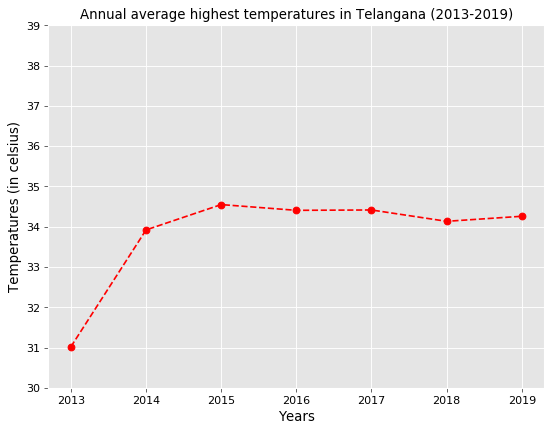

In [12]:
%matplotlib inline

plt.style.use('ggplot')

plt.figure(figsize=(8, 6), dpi=80)

plt.plot(df_yearly_avg_temp['Year'],df_yearly_avg_temp['max_temp'],color='red',marker='o',linestyle='--')

plt.xlabel('Years',color='black')

plt.ylabel('Temperatures (in celsius)',color='black')

plt.yticks(np.arange(30,40,1),labels=list(range(30,41,1)),color='black')

plt.xticks(np.arange(2013,2020,1),color='black')

plt.title('Annual average highest temperatures in Telangana (2013-2019)',fontsize=12,color='black')

plt.show()



Above plot shows that there is huge difference in temperatures between years 2013 and 2014. That is mainly due to insufficent data available in  year 2013.

But the difference in temperatures among other years is almost negligible.

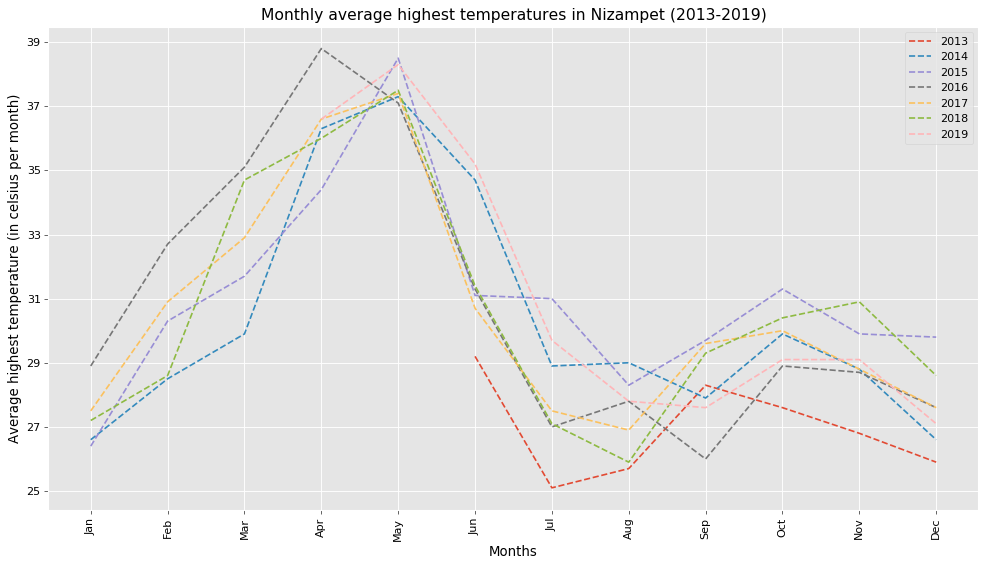

In [13]:
df_nizampet=df_13_20[df_13_20['Mandal']=='Nizampet'].groupby(['Year','Month'],sort=False)['max_temp'].mean().reset_index()

%matplotlib inline

plt.style.use('ggplot')

plt.figure(figsize=(15, 8), dpi=80)

for  i in df_nizampet.Year.unique():
    df_new=df_nizampet[df_nizampet.Year==i]
    plt.plot(df_new['Month'],df_new['max_temp'],linestyle='--')


plt.xlabel('Months',color='black')

plt.ylabel('Average highest temperature (in celsius per month)',color='black')

plt.xticks(np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],Rotation='vertical',color='black')

plt.yticks(np.arange(28,44,2),labels=np.arange(25,44,2),color='black')

plt.title('Monthly average highest temperatures in Nizampet (2013-2019)',fontsize=14,color='black')

plt.legend(['2013','2014','2015','2016','2017','2018','2019'])

plt.show()

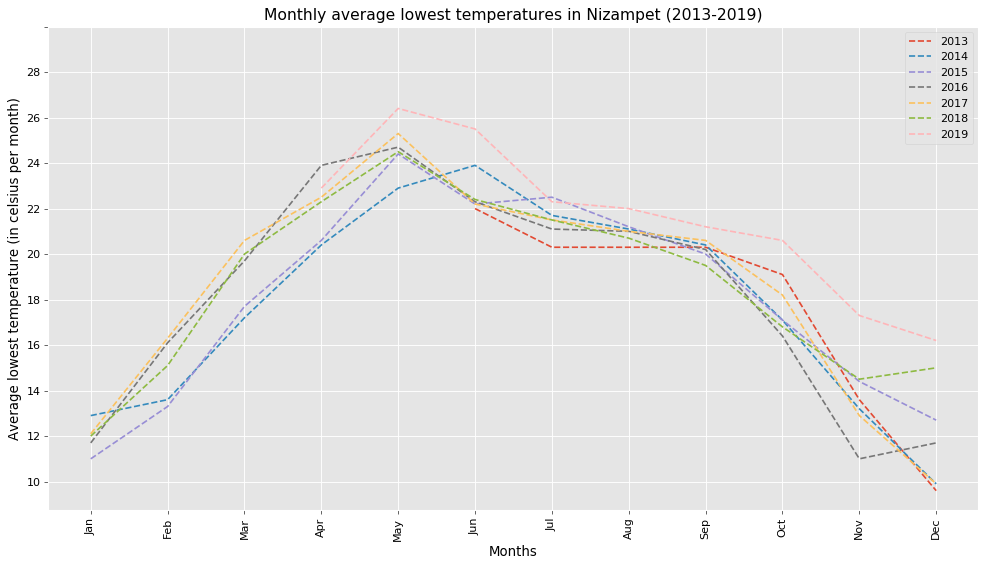

In [14]:
df_nizampet=df_13_20[df_13_20['Mandal']=='Nizampet'].groupby(['Year','Month'],sort=False)['min_temp'].mean().reset_index()

%matplotlib inline

plt.style.use('ggplot')

plt.figure(figsize=(15, 8), dpi=80)

for  i in df_nizampet.Year.unique():
    df_new=df_nizampet[df_nizampet.Year==i]
    plt.plot(df_new['Month'],df_new['min_temp'],linestyle='--')


plt.xlabel('Months',color='black')

plt.ylabel('Average lowest temperature (in celsius per month)',color='black')

plt.xticks(np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],Rotation='vertical',color='black')

plt.yticks(np.arange(12,34,2),labels=np.arange(10,30,2),color='black')

plt.title('Monthly average lowest temperatures in Nizampet (2013-2019)',fontsize=14,color='black')

plt.legend(['2013','2014','2015','2016','2017','2018','2019'])

plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


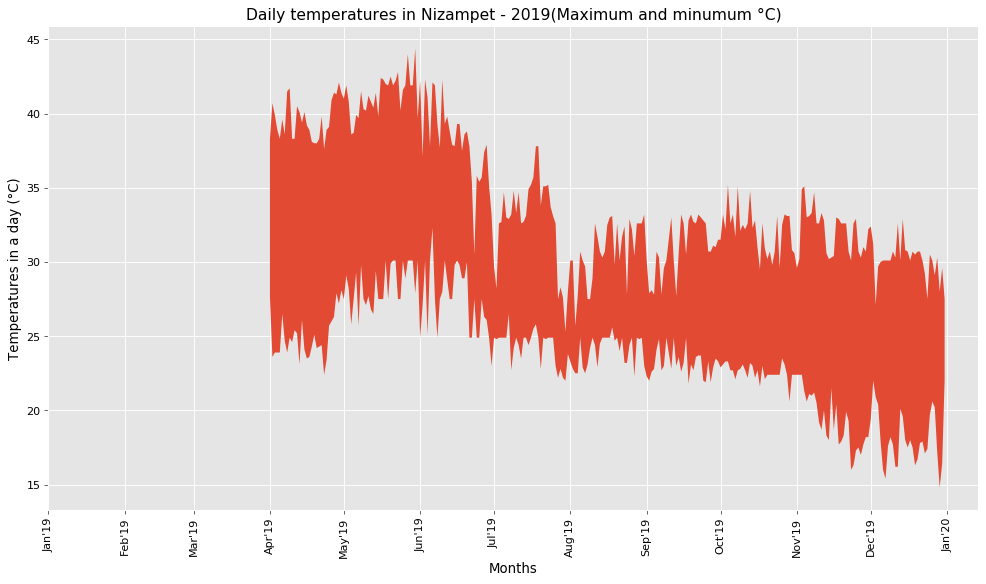

In [15]:
df_nizampet=df_2019[:'2019-12-31'][(df_2019['Mandal']=='Nizampet')]

#Solarize_Light2 -- plot style

plt.style.use('ggplot')

plt.figure(figsize=(15,8),dpi=80)

plt.fill_between(df_nizampet.index,df_nizampet['min_temp'],df_nizampet['max_temp'])

plt.xlabel('Months',color='black')

plt.ylabel('Temperatures in a day (°C)',color='black')

plt.title('Daily temperatures in Nizampet - 2019(Maximum and minumum °C)',fontsize=14,color='black')

plt.xticks(['2019-01','2019-02','2019-03','2019-04','2019-05','2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12','2020-01'],labels=['Jan\'19','Feb\'19','Mar\'19','Apr\'19','May\'19','Jun\'19','Jul\'19','Aug\'19','Sep\'19','Oct\'19','Nov\'19','Dec\'19','Jan\'20'],rotation='vertical',color='black')

plt.yticks(color='black')

plt.show()


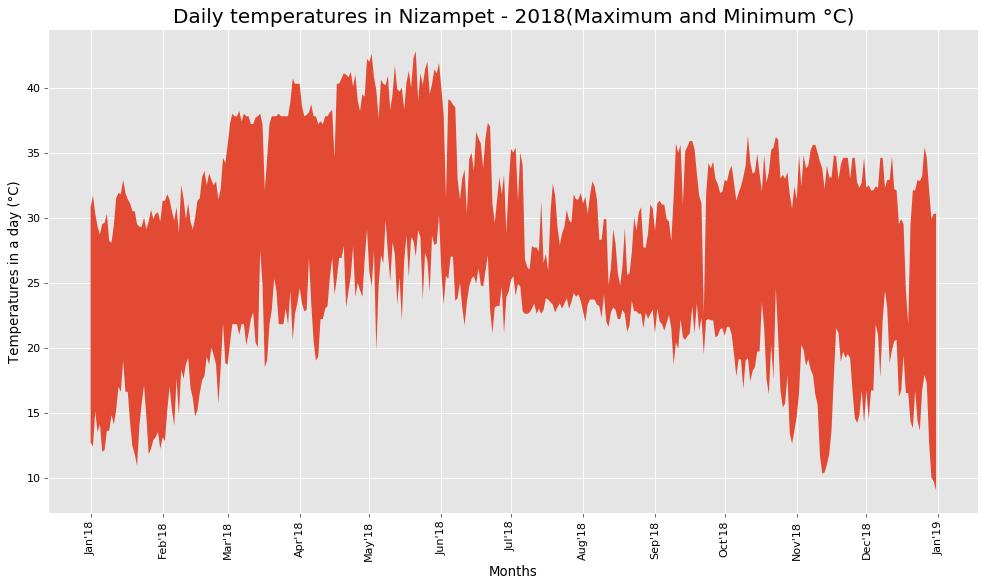

In [16]:
df_nizampet_18=df_2018[:'2018-12-31'][(df_2018['Mandal']=='Nizampet')]

plt.style.use('ggplot')

plt.figure(figsize=(15,8),dpi=80)

plt.fill_between(df_nizampet_18.index,df_nizampet_18['min_temp'],df_nizampet_18['max_temp'])

plt.xlabel('Months',color='black')

plt.ylabel('Temperatures in a day (°C)',color='black')

plt.title('Daily temperatures in Nizampet - 2018(Maximum and Minimum °C)',fontsize=18,color='black')

plt.xticks(['2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01'],labels=['Jan\'18','Feb\'18','Mar\'18','Apr\'18','May\'18','Jun\'18','Jul\'18','Aug\'18','Sep\'18','Oct\'18','Nov\'18','Dec\'18','Jan\'19'],rotation='vertical',color='black')

plt.yticks(color='black')

#plt.grid(None)

plt.show()


C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


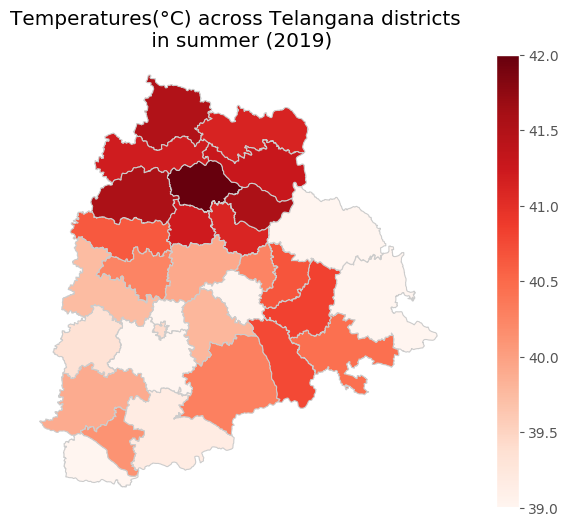

In [18]:
import geopandas as gp

df_2019['District']=df_2019['District'].replace({'Kumuram Bheem - Asifabad':'Kumurambheem Asifabad','Komaram Bheem-Asifabad':'Kumurambheem Asifabad','Rajanna-Siricilla':'Rajanna Sircilla','Warangal (R)':'Warangal_Rural','Warangal (U)':'Warangal_Urban','Warangal Rural':'Warangal_Rural', 'Warangal Urban':'Warangal_Urban','Yadadri-Bhongir':'Yadadri Bhuvanagiri'})

df_geo=gp.read_file('District Boundary.shp')

df_2019_map=df_2019['2019-03-01':'2019-05-31'].groupby('District')['max_temp'].mean().reset_index()

map_1=df_geo.set_index('New_Dist_4').join(df_2019_map.reset_index().set_index('District'))

fig, ax = plt.subplots(figsize=(10,6),dpi=100)

map_2=map_1.plot('max_temp', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')

ax.set_axis_off()

ax.set_title('Temperatures(°C) across Telangana districts \n in summer (2019)')

sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=39, vmax=42))

fig.colorbar(sm)

plt.show()

#ax.annotate('Source: Telangana government, 2019',xy=(0.1, .04),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

In [19]:
plt.savefig('Geographical representation of Temperatures in TS (summer).png')

<Figure size 432x288 with 0 Axes>